In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests

from pprint import pprint

In [2]:
house_data = pd.read_csv("../Resources/zillow_by_year.csv")
jackson_ward_data = pd.read_csv("../Resources/jackson_ward.csv")
manchester_data =pd.read_csv("../Resources/manchester.csv")
oregon_hill_data=pd.read_csv("../Resources/oregon_hill.csv")
richmond_data =pd.read_csv("../Resources/richmond.csv")
scotts_addition_data=pd.read_csv("../Resources/scotts_addition.csv")
shockroe_bottom_data =pd.read_csv("../Resources/shockoe_bottom.csv")
church_hill_data =pd.read_csv("../Resources/church_hill.csv")
church_hill_north_data =pd.read_csv("../Resources/church_hill.csv")

In [3]:
house_data.head()

,Region Name,Region ID,Size Rank,Zip Code,Second Zip Code,Third Zip Code,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,01/2021 - 07/2021
0,The Fan,275702,1140,23220,None,None,127836,123561,142352,162437,...,325518,352072,361787,375400,398726,423322,456708,480578,495304,303858
1,The Museum District,275714,2576,23221,23230,None,101811,117029,127964,141834,...,285041,306324,312329,325949,348648,367651,392892,417523,434587,272206
2,Fulton,276341,4089,23231,None,None,68845,74232,82636,83851,...,96219,96882,105052,116738,118553,129542,143823,150422,164079,110944
3,Eastview,273588,4471,23223,None,None,0,21060,56303,61406,...,73953,62921,68541,69548,67897,72297,89160,100886,111755,76686
4,Ginter Park,243780,4493,23227,23222,None,116266,130858,143066,154101,...,277100,300294,303092,309751,324448,344755,370552,384376,409187,263880


In [4]:
# Pull in all crime data from 2000 - 2020
crime_2000 = pd.read_csv("../Resources/Crime Information 2000.csv")
crime_2001 = pd.read_csv("../Resources/Crime Information 2001.csv")
crime_2002 = pd.read_csv("../Resources/Crime Information 2002.csv")
crime_2003 = pd.read_csv("../Resources/Crime Information 2003.csv")
crime_2004 = pd.read_csv("../Resources/Crime Information 2004.csv")
crime_2005 = pd.read_csv("../Resources/Crime Information 2005.csv")
crime_2006 = pd.read_csv("../Resources/Crime Information 2006.csv")
crime_2007 = pd.read_csv("../Resources/Crime Information 2007.csv")
crime_2008 = pd.read_csv("../Resources/Crime Information 2008.csv")
crime_2009 = pd.read_csv("../Resources/Crime Information 2009.csv")
crime_2010 = pd.read_csv("../Resources/Crime Information 2010.csv")
crime_2011 = pd.read_csv("../Resources/Crime Information 2011.csv")
crime_2012 = pd.read_csv("../Resources/Crime Information 2012.csv")
crime_2013 = pd.read_csv("../Resources/Crime Information 2013.csv")
crime_2014 = pd.read_csv("../Resources/Crime Information 2014.csv")
crime_2015 = pd.read_csv("../Resources/Crime Information 2015.csv")
crime_2016 = pd.read_csv("../Resources/Crime Information 2016.csv")
crime_2017 = pd.read_csv("../Resources/Crime Information 2017.csv")
crime_2018 = pd.read_csv("../Resources/Crime Information 2018.csv")
crime_2019 = pd.read_csv("../Resources/Crime Information 2019.csv")
crime_2020 = pd.read_csv("../Resources/Crime Information 2020.csv")

In [5]:
# Combined crime data totals
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_crime_df = pd.DataFrame(columns=["NEIGHBORHOOD_NAME", "HOMICIDE", "SEX_OFFENSE", "ROBBERY",
                                       "ASSAULT", "BURGLARY", "VICE", "THEFT", "VEH_THEFT", "OTHER"])
crime_2000.loc['2000',:] = crime_2000.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2000.iloc[-1, :])
crime_2001.loc['2001',:] = crime_2001.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2001.iloc[-1, :])
crime_2002.loc['2002',:] = crime_2002.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2002.iloc[-1, :])
crime_2003.loc['2003',:] = crime_2003.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2003.iloc[-1, :])
crime_2004.loc['2004',:] = crime_2004.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2004.iloc[-1, :])
crime_2005.loc['2005',:] = crime_2005.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2005.iloc[-1, :])
crime_2006.loc['2006',:] = crime_2006.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2006.iloc[-1, :])
crime_2007.loc['2007',:] = crime_2007.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2007.iloc[-1, :])
crime_2008.loc['2008',:] = crime_2008.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2008.iloc[-1, :])
crime_2009.loc['2009',:] = crime_2009.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2009.iloc[-1, :])
crime_2010.loc['2010',:] = crime_2010.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2010.iloc[-1, :])
crime_2011.loc['2011',:] = crime_2011.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2011.iloc[-1, :])
crime_2012.loc['2012',:] = crime_2012.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2012.iloc[-1, :])
crime_2013.loc['2013',:] = crime_2013.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2013.iloc[-1, :])
crime_2014.loc['2014',:] = crime_2014.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2014.iloc[-1, :])
crime_2015.loc['2015',:] = crime_2015.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2015.iloc[-1, :])
crime_2016.loc['2016',:] = crime_2016.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2016.iloc[-1, :])
crime_2017.loc['2017',:] = crime_2017.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2017.iloc[-1, :])
crime_2018.loc['2018',:] = crime_2018.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2018.iloc[-1, :])
crime_2019.loc['2019',:] = crime_2019.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2019.iloc[-1, :])
crime_2020.loc['2020',:] = crime_2020.sum(axis=0)
total_crime_df = total_crime_df.append(crime_2020.iloc[-1, :])
total_crime_df["YEAR"] = years
total_crime_df = total_crime_df[["YEAR", "HOMICIDE", "SEX_OFFENSE", "ROBBERY", 
                                 "ASSAULT", "BURGLARY", "VICE", "THEFT", "VEH_THEFT", "OTHER"]]
total_crime_df["TOTAL_CRIME"] = (total_crime_df["HOMICIDE"] + total_crime_df["SEX_OFFENSE"] + 
                                 total_crime_df["ROBBERY"] + total_crime_df["ASSAULT"] + total_crime_df["BURGLARY"] + 
                                 total_crime_df["VICE"] + total_crime_df["THEFT"] + total_crime_df["VEH_THEFT"] + 
                                 total_crime_df["OTHER"])
total_crime_df = total_crime_df.set_index("YEAR")
total_crime_df = total_crime_df.astype(int)

# Add column for percent change year to year
prior_year = 0
total_crime_df["CRIME_PERCENT_CHANGE"] = ""
for index, row in total_crime_df.iterrows():
    if prior_year == 0:
        total_crime_df.loc[index, "CRIME_PERCENT_CHANGE"] = 0
        prior_year = row["TOTAL_CRIME"]
    else:
        total_crime_df.loc[index, "CRIME_PERCENT_CHANGE"] = ((row["TOTAL_CRIME"] - prior_year)/prior_year)*100
        prior_year = row["TOTAL_CRIME"]

total_crime_df

,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,TOTAL_CRIME,CRIME_PERCENT_CHANGE
YEAR,,,,,,,,,,,
2000,75,296,1091,5908,2841,2430,10866,2548,21578,47633,0
2001,67,291,1328,6341,2871,1629,10953,2762,20581,46823,-1.700502
2002,83,356,1316,5718,3039,1780,12141,2537,18182,45152,-3.568759
2003,88,273,1336,5699,3113,1820,10823,2890,15921,41963,-7.06281
2004,90,245,1304,5351,2716,1953,8091,2369,14038,36157,-13.835998
2005,83,238,1196,5239,2511,2754,8220,2214,16667,39122,8.200348
2006,72,216,995,5447,2281,2937,6354,1421,19735,39458,0.858852
2007,55,168,962,5334,1875,2786,5634,1240,23159,41213,4.447767
2008,31,158,772,4980,1748,2690,5306,1022,21739,38446,-6.713901


In [6]:
#To see example of one full database
jackson_ward_data.head()

,YEAR,NEIGHBORHOOD_NAME,HOMICIDE,SEX_OFFENSE,ROBBERY,ASSAULT,BURGLARY,VICE,THEFT,VEH_THEFT,OTHER,TOTAL_CRIME,AVERAGE_HOUSE_PRICE,CRIME_PERCENT_CHANGE,PRICE_PERCENT_CHANGE
0,2000,JACKSON WARD,3,4,33,61,57,79,226,34,344,841,90058,0.000000,0.000000
1,2001,JACKSON WARD,0,2,22,64,30,36,161,33,261,609,87868,-27.586207,-2.431766
2,2002,JACKSON WARD,0,9,28,62,38,38,200,28,264,667,108740,9.523810,23.753813
3,2003,JACKSON WARD,1,6,34,56,29,26,171,44,243,610,123348,-8.545727,13.433879
4,2004,JACKSON WARD,0,0,32,57,36,38,115,38,201,517,149908,-15.245902,21.532575


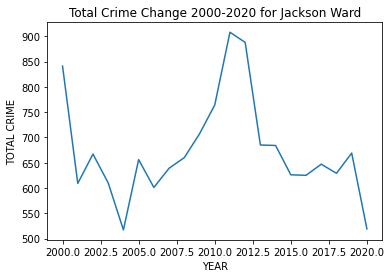

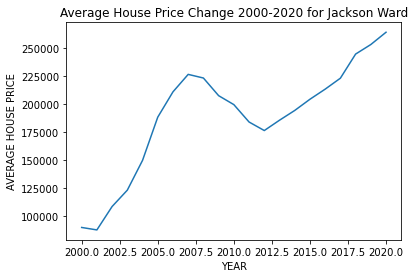

In [7]:
#line graphs for both of sample Neighborhood Jackson Ward
#can be repeated on each neighborhood
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime Change 2000-2020 for Jackson Ward')

plt.show()

plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['AVERAGE_HOUSE_PRICE'])
plt.xlabel('YEAR')
plt.ylabel('AVERAGE HOUSE PRICE')
plt.title(f'Average House Price Change 2000-2020 for Jackson Ward')


plt.show()

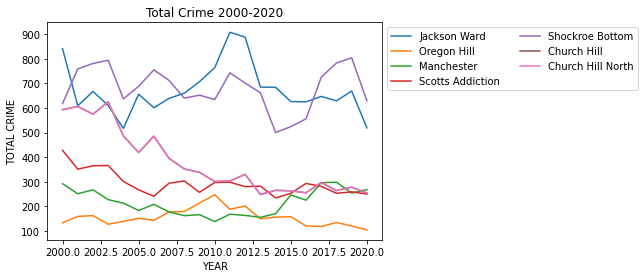

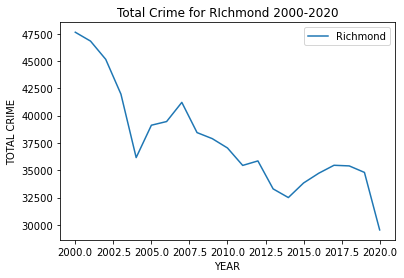

In [8]:
#line graph comparing 5 subset neighborhoods

plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['TOTAL_CRIME'])
plt.plot(manchester_data['YEAR'], manchester_data['TOTAL_CRIME'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['TOTAL_CRIME'])
plt.plot(shockroe_bottom_data['YEAR'], shockroe_bottom_data['TOTAL_CRIME'])
plt.plot(church_hill_data['YEAR'],church_hill_data['TOTAL_CRIME'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['TOTAL_CRIME'])

plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020')

plt.legend(['Jackson Ward','Oregon Hill','Manchester','Scotts Addiction','Shockroe Bottom','Church Hill','Church Hill North'],bbox_to_anchor=(1,1), loc='upper left',ncol=2)


plt.show()



plt.plot(richmond_data['YEAR'], richmond_data['TOTAL_CRIME'])

plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime for RIchmond 2000-2020')

plt.legend(['Richmond'],loc='upper right')

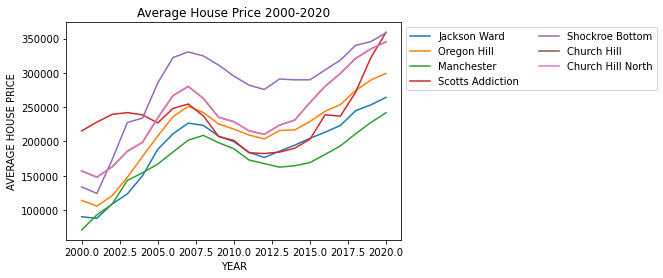

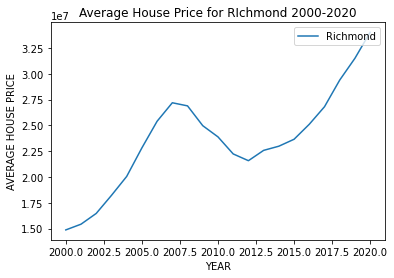

In [9]:
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['AVERAGE_HOUSE_PRICE'])
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(manchester_data['YEAR'], manchester_data['AVERAGE_HOUSE_PRICE'])
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['AVERAGE_HOUSE_PRICE'])
plt.plot(shockroe_bottom_data['YEAR'], shockroe_bottom_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_data['YEAR'], church_hill_data['AVERAGE_HOUSE_PRICE'])
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['AVERAGE_HOUSE_PRICE'])

plt.legend(['Jackson Ward','Oregon Hill','Manchester','Scotts Addiction','Shockroe Bottom','Church Hill','Church Hill North'],bbox_to_anchor=(1,1), loc='upper left',ncol=2)

plt.xlabel('YEAR')
plt.ylabel('AVERAGE HOUSE PRICE')
plt.title(f'Average House Price 2000-2020')


plt.show()

#plot Richmond total

plt.plot(richmond_data['YEAR'], richmond_data['AVERAGE_HOUSE_PRICE'])

plt.xlabel('YEAR')
plt.ylabel('AVERAGE HOUSE PRICE')
plt.title(f'Average House Price for RIchmond 2000-2020')

plt.legend(['Richmond'],loc='upper right')


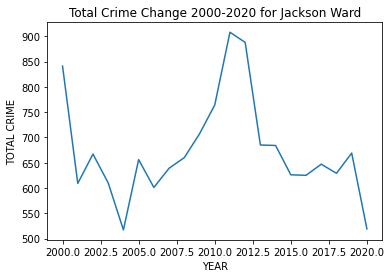

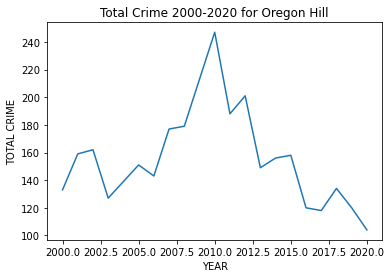

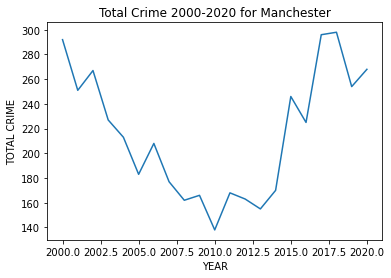

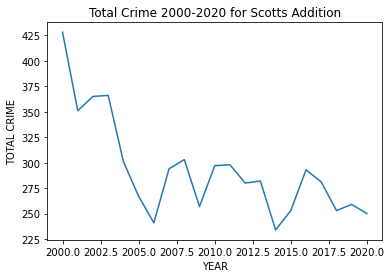

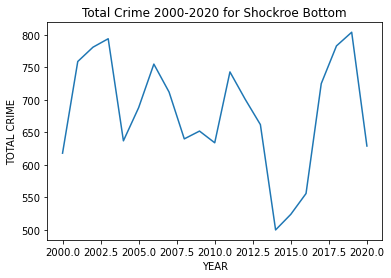

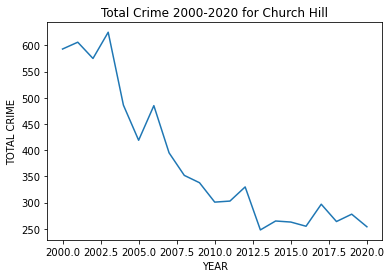

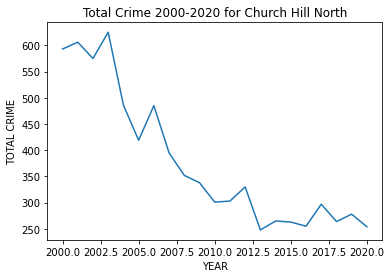

In [10]:
#Separating crime graphs for each neighborhood for better image

#Jackson Ward
plt.plot(jackson_ward_data['YEAR'], jackson_ward_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime Change 2000-2020 for Jackson Ward')

plt.show()


#Oregon Hill
plt.plot(oregon_hill_data['YEAR'], oregon_hill_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Oregon Hill')

plt.show()


#Manchester
plt.plot(manchester_data['YEAR'], manchester_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Manchester')

plt.show()



#Scotts Addition
plt.plot(scotts_addition_data['YEAR'], scotts_addition_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Scotts Addition')

plt.show()



#Shockroe Bottom
plt.plot(shockroe_bottom_data['YEAR'], shockroe_bottom_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Shockroe Bottom')

plt.show()


#Church Hill
plt.plot(church_hill_data['YEAR'], church_hill_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Church Hill')

plt.show()

#Church Hill North
plt.plot(church_hill_north_data['YEAR'], church_hill_north_data['TOTAL_CRIME'])
plt.xlabel('YEAR')
plt.ylabel('TOTAL CRIME')
plt.title(f'Total Crime 2000-2020 for Church Hill North')

plt.show()

In [11]:
#jackson_ward_data['CRIME_PERCENT_CHANGE'].sum()
#total_oregon=oregon_hill_data['CRIME_PERCENT_CHANGE'].sum()
#total_manchester=manchester_data['CRIME_PERCENT_CHANGE'].sum()
#scotts_addition_data['CRIME_PERCENT_CHANGE'].sum()
#shockroe_bottom_data['CRIME_PERCENT_CHANGE'].sum()
#church_hill_data ['CRIME_PERCENT_CHANGE'].sum()
#church_hill_north_data['CRIME_PERCENT_CHANGE'].sum()
#richmond_data  ['CRIME_PERCENT_CHANGE'].sum()

#crime_list
crime_change_df = pd.DataFrame()
crime_change_df['Manchester'] = manchester_data['CRIME_PERCENT_CHANGE']
crime_change_df['Oregon Hill'] =oregon_hill_data['CRIME_PERCENT_CHANGE']
crime_change_df['Scotts Addition'] =scotts_addition_data['CRIME_PERCENT_CHANGE']
crime_change_df['Shockroe Bottom'] =shockroe_bottom_data['CRIME_PERCENT_CHANGE']
crime_change_df ['Church Hill'] =church_hill_data ['CRIME_PERCENT_CHANGE']
crime_change_df ['Church Hill North']=church_hill_north_data['CRIME_PERCENT_CHANGE']
crime_change_df['Jackson Ward']=jackson_ward_data['CRIME_PERCENT_CHANGE']
crime_change_df['Richmond']=richmond_data['CRIME_PERCENT_CHANGE']

crime_change_df.loc['Totals',:]=crime_change_df.sum(axis=0)
crime_change_df.iloc[-1,0]

crime_change_df.head(22)

,Manchester,Oregon Hill,Scotts Addition,Shockroe Bottom,Church Hill,Church Hill North,Jackson Ward,Richmond
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-14.041096,19.548872,-17.990654,22.815534,2.192243,2.192243,-27.586207,-1.700502
2,6.374502,1.886792,3.988604,2.898551,-5.115512,-5.115512,9.523810,-3.568759
3,-14.981273,-21.604938,0.273973,1.664533,8.695652,8.695652,-8.545727,-7.062810
4,-6.167401,9.448819,-17.759563,-19.773300,-22.240000,-22.240000,-15.245902,-13.835998
5,-14.084507,8.633094,-11.295681,8.006279,-13.786008,-13.786008,26.885880,8.200348
6,13.661202,-5.298013,-9.737828,9.738372,15.751790,15.751790,-8.384146,0.858852
7,-14.903846,23.776224,21.991701,-5.695364,-18.556701,-18.556701,6.322795,4.447767
8,-8.474576,1.129944,3.061224,-10.112360,-10.886076,-10.886076,3.286385,-6.713901
9,2.469136,18.994413,-15.181518,1.875000,-3.977273,-3.977273,7.121212,-1.438381


In [12]:
crime_change=crime_change_df.loc[["Totals"],["Manchester","Oregon Hill","Scotts Addition","Shockroe Bottom","Church Hill","Church Hill North","Jackson Ward","Richmond"]]
crime_change.head()

,Manchester,Oregon Hill,Scotts Addition,Shockroe Bottom,Church Hill,Church Hill North,Jackson Ward,Richmond
Totals,15.664293,-0.323779,-40.329501,20.379776,-69.054061,-69.054061,-28.884058,-43.877015


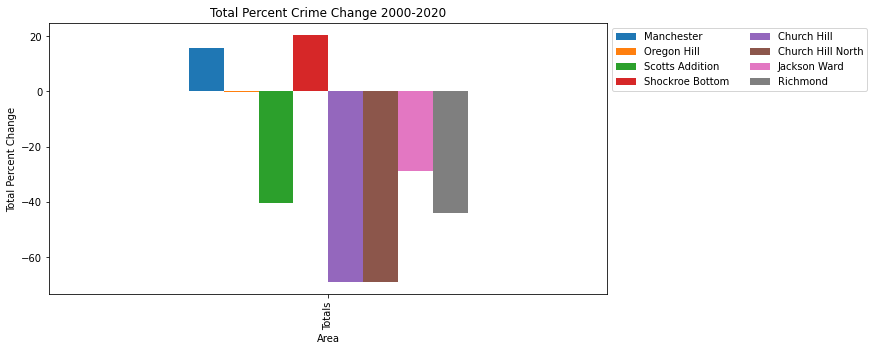

In [13]:
crime_change.plot(kind ="bar",figsize=(10,5))
plt.xlabel('Area')
plt.ylabel('Total Percent Change')
plt.title(f'Total Percent Crime Change 2000-2020')

plt.legend(bbox_to_anchor=(1,1), loc='upper left',ncol=2)

plt.show()